# HP4021 TPT3 - EEG LAB
In this lab, you will be require to design an experimenta procedure based on the EEG analysis of a) one baseline and one task, or b) two different tasks. 

Useful links: https://bitalino.com/datasheets/EEG_Sensor_Datasheet.pdf  
MNE Python: https://mne.tools/stable/index.html

In [1]:
import mne
import sys
import platform
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from mne.time_frequency import psd_multitaper, psd_welch

In [2]:
print('Operating System:', sys.platform, platform.linux_distribution())

Operating System: linux ('LinuxMint', '19.2', 'tina')


In [3]:
print("Python and Packages' versions")
print("Python",sys.version)
print('MNE',mne.__version__)
print('Numpy',np.__version__)
print('Scipy',sp.__version__)
print('Pandas',pd.__version__)

Python and Packages' versions
Python 3.6.8 (default, Oct  7 2019, 12:59:55) 
[GCC 8.3.0]
MNE 0.19.0
Numpy 1.17.2
Scipy 1.3.1
Pandas 0.25.1


## Is it important to type the software version in your report?
https://www.vice.com/en_us/article/zmjwda/a-code-glitch-may-have-caused-errors-in-more-than-100-published-studies


## Here we define all the variables we need later in the process

In [14]:
BASEPATH = '/home/giulio/Dropbox/PhD/Courses/HP4021/eeg/' #This is the basepath of our project 
RAW = BASEPATH + 'Raw/' #This points to the folder containing the raw data
PROCESSED = BASEPATH + 'Processed/' #Here is where we are gonna save our processed data

CHANNEL = 'AFz' # Channel used according to the 10-20 montage 
SAMPLINGRATE = 100 # Sampling rate of the recorded signal
COLUMNS = [] #This can be found in your Bitalino's recordings

filename = "Giulio_A.txt" #input file
INPUT = RAW + filename
OUTPUT = PROCESSED + filename[:-3]+"_PSD.csv" #Output file

In [16]:
## Here we define all the information we need about the EEG data

In [6]:
# EEG Setup 
n_channels = 1 # Number of channel
sampling_rate = SAMPLINGRATE #Sampling rate ot the recroding
channel_names =  [CHANNEL] #Channels
channel_types = ['eeg'] #Channels' type
channel_map = mne.channels.make_standard_montage(kind="standard_1020") # Channel map - montage

## We load the data and we plot it to make sure the signal is correctly loaded

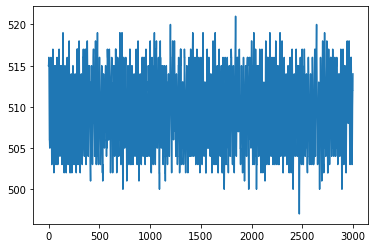

In [7]:
raw_file = pd.read_csv(INPUT, skiprows=3,sep='\t', names=["I1", "I2", "O1", "O2", "A1", "A2", "A3", "A4", "A5", "A6"]).reset_index()
rawEEG = raw_file.A1[0:SAMPLINGRATE * 30].to_numpy() # Convert the signal to numpy array (keep only 30s)
plt.plot(rawEEG) #visualize the data 

In [8]:
rawEEG #This is used to check if your signal is correctly loaded

array([515, 515, 516, ..., 512, 512, 514])

## Let's create the EEG dataset

In [9]:
# Here we create a database
#We initialize it by giving the channel names, sampling rate and channel types
info = mne.create_info(channel_names, sampling_rate,channel_types)
info['description'] = "Database EEG" #We can give it a brief description
        
custom_raw = mne.io.RawArray([rawEEG], info) #This associate the information to the raw Data
custom_raw.set_montage(channel_map) # Finally we assign a montage

Creating RawArray with float64 data, n_channels=1, n_times=3000
    Range : 0 ... 2999 =      0.000 ...    29.990 secs
Ready.
DigMontage is a superset of info. 93 in DigMontage will be ignored. The ignored channels are: {'C4', 'F3', 'PO9', 'F7', 'AF5', 'P3', 'CP2', 'FT8', 'PO1', 'PO10', 'P5', 'C1', 'PO5', 'C6', 'TP7', 'AF1', 'PO6', 'P7', 'FT10', 'Pz', 'P1', 'Fpz', 'Oz', 'PO2', 'AF4', 'C3', 'CP1', 'CP6', 'PO7', 'F1', 'TP8', 'F2', 'Iz', 'P9', 'O10', 'T6', 'POz', 'O1', 'AF9', 'FC1', 'F9', 'F5', 'F6', 'FCz', 'CP5', 'P8', 'T10', 'M2', 'F4', 'CP4', 'FC6', 'AF6', 'PO4', 'Fp2', 'Fp1', 'FC5', 'AF2', 'FC2', 'Fz', 'FC4', 'P4', 'FT7', 'O9', 'A2', 'T9', 'T8', 'FC3', 'A1', 'AF10', 'T7', 'PO8', 'C5', 'TP9', 'P10', 'F10', 'T3', 'C2', 'PO3', 'T5', 'M1', 'AF3', 'CPz', 'TP10', 'P2', 'Cz', 'O2', 'F8', 'CP3', 'P6', 'T4', 'AF8', 'FT9', 'AF7'}


<RawArray  |  None, n_channels x n_times : 1 x 3000 (30.0 sec), ~33 kB, data loaded>

## Preprocessing

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.51
- Lower transition bandwidth: 0.51 Hz (-6 dB cutoff frequency: 0.26 Hz)
- Filter length: 647 samples (6.470 sec)

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 47.50 Hz)
- Filter length: 67 samples (0.670 sec)

Setting up band-stop filter from 4.5 - 5.5 Hz

FIR filter parameters
---------------------
Des

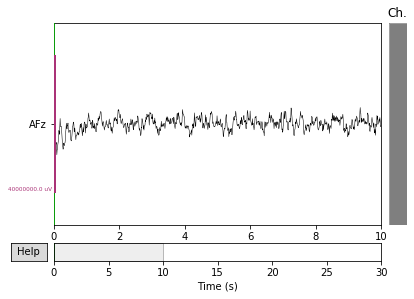

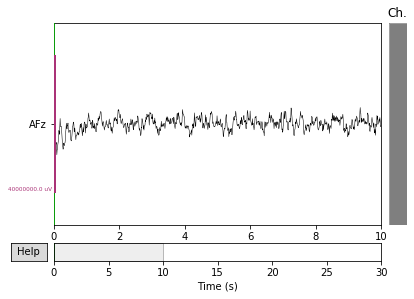

In [10]:
#hight_pass and low_pass filters.
filtered = custom_raw # This initialize the filtered signal
filtered.filter(l_freq=0.51, h_freq=None) # This applies a high pass filter (everything above 0.51Hz is kept)
filtered.filter(l_freq=None, h_freq=45.0)# This applies a low pass filter (everything belove 45.0Hz is kept)
filtered.notch_filter(5) # This applies a notch filter (everything different from 5Hz - Bitalino's battery voltage)

scaling = dict(eeg= 20) # For visualization purposes, we scale our signal to 1/20
filtered.plot(scalings=scaling) # and we create a graphical representation of our signal

Effective window size : 20.480 (s)
Need more than one channel to make topography for eeg. Disabling interactivity.


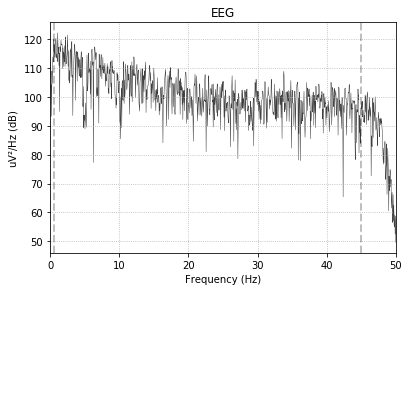

In [24]:
filtered.plot_psd() #Graphical representation of the spectrum
pass

## Power Analysis

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


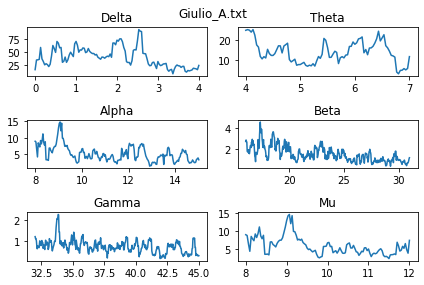

In [21]:
bands = {'Delta':{'min':0, 'max':4},
         'Theta':{'min':4, 'max':7},
         'Alpha':{'min':8, 'max':15},
         'Beta':{'min':16, 'max':31},
         'Gamma':{'min':32, 'max':45},
         'Mu':{'min':8, 'max':12},
        }

newdf = []


for band in bands: # For each band
    plt.subplot(3, 2, list(bands.keys()).index(band)+1) # we initialize a subplot
    plt.title(band) # we add a title
    psds, freqs = psd_multitaper(filtered, fmin=bands[band]['min'], fmax=bands[band]['max']) # we get the PSD
    plt.plot(freqs, psds[0]) # and we plot it
    newdf.append([band, bands[band]['min'], bands[band]['max'],sum(psds[0])])
plt.suptitle(filename) # Add a title above the plot
plt.tight_layout()
plt.savefig(OUTPUT[:-3]+'png') # Save the fig
 
pd.DataFrame(newdf, columns=['Band','Min Freq.','Max Freq.','PSD']).to_csv(OUTPUT) # Save the output